# Project 1: Seattle AirBnB
## Main Questions
### Q1 - On average, what are the most expensives by beds properties type in Seattle?
### Q2 - How the price varies by months in Seattle?
### Q3 - What is the average price splited by properties type and neighbourhood in Seattle?


In [441]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [442]:
df_cld = pd.read_csv('calendar.csv')
df_lst = pd.read_csv('listings.csv')

In [443]:
df_cld.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [444]:
df_lst.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [445]:
#Treatment of data from 'calendar.csv' dataset
df_cld['price'] = df_cld['price'].str.replace('[\$\,]', '').astype('float64')  
df_cld['date'] = pd.to_datetime(df_cld['date'])                                
df_cld['month'] = df_cld.date.dt.month

#Treatment of data from 'listing.csv' dataset
df_lst.rename(columns = {'id' : 'listing_id'}, inplace = True)

In [449]:
# Getting the number of listing by property type
sr_prop_type = df_lst['property_type'].value_counts()
sr_prop_type

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

In [450]:
#Creating the DataFrame which will be analised later
df_1_analysis = pd.merge(df_cld, df_lst.loc[:, ['listing_id', 'property_type', 'room_type', 'bedrooms', 'beds']], on = 'listing_id', how = 'left')

#Treatment of data from DataFrame created in previous step
df_1_analysis['bedrooms'] = df_1_analysis['bedrooms'].replace(0, df_1_analysis['bedrooms'].mean())
df_1_analysis['beds'] = df_1_analysis['beds'].replace(0, df_1_analysis['beds'].mean())
df_1_analysis['bedrooms_price'] = df_1_analysis['price'] / df_1_analysis['bedrooms']
df_1_analysis['beds_price'] = df_1_analysis['price'] / df_1_analysis['beds']
df_1_analysis.head()

,listing_id,date,available,price,month,property_type,room_type,bedrooms,beds,bedrooms_price,beds_price
0,241032,2016-01-04,t,85.0,1,Apartment,Entire home/apt,1.0,1.0,85.0,85.0
1,241032,2016-01-05,t,85.0,1,Apartment,Entire home/apt,1.0,1.0,85.0,85.0
2,241032,2016-01-06,f,NaN,1,Apartment,Entire home/apt,1.0,1.0,NaN,NaN
3,241032,2016-01-07,f,NaN,1,Apartment,Entire home/apt,1.0,1.0,NaN,NaN
4,241032,2016-01-08,f,NaN,1,Apartment,Entire home/apt,1.0,1.0,NaN,NaN


In [499]:
df = df_1_analysis[df_1_analysis['property_type'] == 'Condominium']
df = df.loc[: , ['month', 'price', 'beds']]
df = df.groupby('month').agg({'price': 'mean', 'beds': 'sum'})

#df['p'] = df['price'] / df['beds']
df

,price,beds
month,,
1,156.042553,4620.0
2,168.622931,4466.0
3,168.587354,4774.0
4,178.923920,4620.0
5,175.566085,4774.0
6,169.098592,4620.0
7,173.053457,4774.0
8,171.361242,4774.0
9,168.425518,4620.0


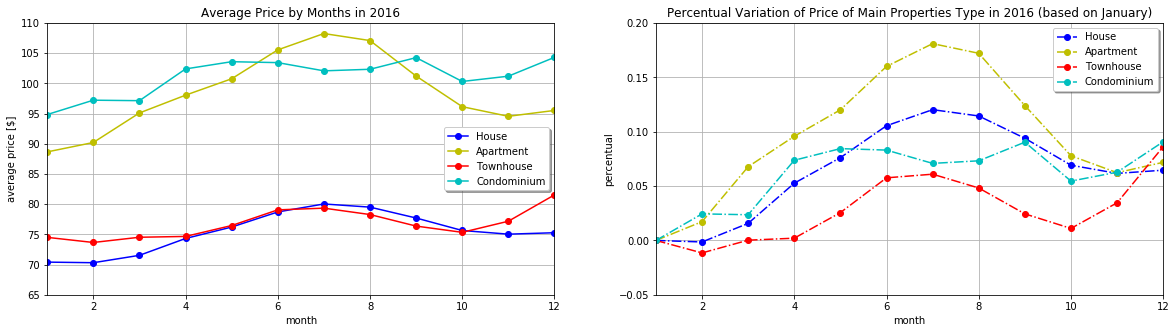

In [465]:
#Plotting Section

#Groupping the df_1_analysis in order to plot
#df_1_analysis_grp = df_1_analysis.groupby(['property_type', 'month'])['bedrooms_price'].mean()
df_1_analysis_grp = df_1_analysis.groupby(['property_type', 'month'])['beds_price'].mean() 

#Dictionary for help formatting each linestyle
dic_fmt = {1 : 'bo-', 2 : 'yo-', 3 : 'ro-', 4 : 'co-',
           5 : 'bo-.', 6 : 'yo-.', 7 : 'ro-.', 8 : 'co-.'}

#Creating variable that will support the plotting
fig, graph = plt.subplots(1, 2)
count = 1

#Inputting of data
for prop_type in list(df_prop_type.index[:4]):
    df_plot = pd.DataFrame(df_1_analysis_grp[prop_type]).reset_index()
    #df_plot['prec_raise'] = (df_plot['bedrooms_price'] - df_plot.iloc[0,1]) / df_plot['bedrooms_price']
    df_plot['prec_raise'] = (df_plot['beds_price'] - df_plot.iloc[0,1]) / df_plot['beds_price']
    
    x= list(df_plot['month'])
    #y1= list(df_plot['bedrooms_price'])
    y1= list(df_plot['beds_price'])
    y2= list(df_plot['prec_raise'])

    graph[0].plot(x,y1, dic_fmt[count], label = prop_type)
    graph[1].plot(x,y2, dic_fmt[count+4], label = prop_type)
    
    count += 1

#Setting of charts
fig.set_size_inches(20, 5)
graph[0].legend(shadow = True)
graph[0].set(xlabel = 'month', ylabel = 'average price [$]', 
             title = 'Average Price by Months in 2016',
             xlim = [1, 12], ylim=[65, 110]) #ylim=[65, 115] beds            
graph[1].legend(shadow = True) 
graph[1].set(xlabel = 'month', ylabel = 'percentual', 
             title = 'Percentual Variation of Price of Main Properties Type in 2016 (based on January)',
             xlim = [1, 12], ylim=[-0.05, 0.2])
graph[0].grid()
graph[1].grid()

plt.show()


# CONCLUSION

##### ****First**** - Both charts show us that the prices reach the maximum in middle of summer for the majority of properties type. It is a strong signal that the biggest people´s movement in this city occurs in summer, probably boosted by tourism movement because Seattle is a coastal city. But this role is not followed by condominiuns that tend to have a little variation in summer.

##### ****Second**** - The left chart indicates that the most expensive properties type are apartment and condominium whereas the cheapest are townhouse and house. Another important information comes from the right chart: the percentual raising of (based in January 2016) price have been between 5% and 10 % for all properties type, but apartaments and houses reasing raises more than 15% and 10% in high summer (in July), respectively.

In [285]:
#Merging dataframe in order to create dataset for second analysis
lft = df_1_analysis
rgt = df_lst.loc[:, ['listing_id','neighbourhood_group_cleansed']] 
df_2_analysis = pd.merge(lft, rgt, on = 'listing_id', how = 'left')
df_2_analysis.head()

,listing_id,date,available,price,month,property_type,room_type,bedrooms,beds,bedrooms_price,beds_price,neighbourhood_group_cleansed
0,241032,2016-01-04,t,85.0,1,Apartment,Entire home/apt,1.0,1.0,85.0,85.0,Queen Anne
1,241032,2016-01-05,t,85.0,1,Apartment,Entire home/apt,1.0,1.0,85.0,85.0,Queen Anne
2,241032,2016-01-06,f,NaN,1,Apartment,Entire home/apt,1.0,1.0,NaN,NaN,Queen Anne
3,241032,2016-01-07,f,NaN,1,Apartment,Entire home/apt,1.0,1.0,NaN,NaN,Queen Anne
4,241032,2016-01-08,f,NaN,1,Apartment,Entire home/apt,1.0,1.0,NaN,NaN,Queen Anne


In [286]:
#Number listings per Neighbourhood Group
df_lst['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

In [287]:
df_2_analysis.groupby('neighbourhood_group_cleansed')['beds_price'].mean().sort_values(ascending = False)

neighbourhood_group_cleansed
Downtown               115.242298
Interbay               109.819093
Cascade                105.166880
Queen Anne             104.421035
Magnolia                99.699445
Capitol Hill            95.858009
West Seattle            85.731365
Central Area            81.968559
Other neighborhoods     77.248743
Ballard                 74.577186
Beacon Hill             68.876384
Lake City               68.005195
Delridge                67.887545
Rainier Valley          66.508048
University District     65.502825
Northgate               62.336721
Seward Park             61.318040
Name: beds_price, dtype: float64

In [288]:
#sr_ngbhood_grp = df_2_analysis.groupby(['property_type', 'neighbourhood_group_cleansed'])['beds_price'].mean()
sr_ngbhood_grp = sr_ngbhood_grp[list(df_prop_type.index[:4])] 
sr_ngbhood_grp.head(50)

property_type  neighbourhood_group_cleansed
Apartment      Ballard                          83.186023
               Beacon Hill                      68.051095
               Capitol Hill                    102.643041
               Cascade                         110.691845
               Central Area                     86.520327
               Delridge                         83.934334
               Downtown                        116.279570
               Interbay                        138.813535
               Lake City                        67.461765
               Magnolia                        143.048839
               Northgate                        57.005725
               Other neighborhoods              84.479996
               Queen Anne                      104.626461
               Rainier Valley                   70.553898
               Seward Park                      69.570684
               University District              69.560659
               West Seattle 

In [374]:
df.unstack(0).sort_index()

property_type,Condominium,Apartment,Townhouse,House
neighbourhood_group_cleansed,,,,
Ballard,72.977433,83.186023,71.128654,72.092260
Beacon Hill,NaN,68.051095,89.908419,62.915013
Capitol Hill,96.409247,102.643041,85.827870,79.420669
Cascade,113.086304,110.691845,122.000000,89.305355
Central Area,82.677170,86.520327,73.657953,81.371208
Delridge,NaN,83.934334,53.746066,65.823375
Downtown,111.907811,116.279570,NaN,127.670613
Interbay,165.168539,138.813535,NaN,80.024167
Lake City,NaN,67.461765,NaN,67.913649


In [375]:
df_1 = df.unstack(0).sort_index()
df_1.fillna(0, inplace = True)
df_1['total'] = df_1['Condominium'] + df_1['Apartment'] + df_1['Townhouse'] + df_1['House']
df_1.sort_values(by = ['total'], ascending = False, inplace= True)
df_1

property_type,Condominium,Apartment,Townhouse,House,total
neighbourhood_group_cleansed,,,,,
Queen Anne,107.375000,104.626461,127.825987,103.121020,442.948468
Magnolia,140.000000,143.048839,67.768243,88.931442,439.748523
Cascade,113.086304,110.691845,122.000000,89.305355,435.083504
Interbay,165.168539,138.813535,0.000000,80.024167,384.006241
West Seattle,139.303393,85.779672,66.320253,83.629785,375.033103
Capitol Hill,96.409247,102.643041,85.827870,79.420669,364.300827
Downtown,111.907811,116.279570,0.000000,127.670613,355.857994
Central Area,82.677170,86.520327,73.657953,81.371208,324.226658
Ballard,72.977433,83.186023,71.128654,72.092260,299.384371


In [382]:
lst_sum = [y_house, y_apart, y_townh, y_condo]
val = np.sum(lst_sum[:1], 0)

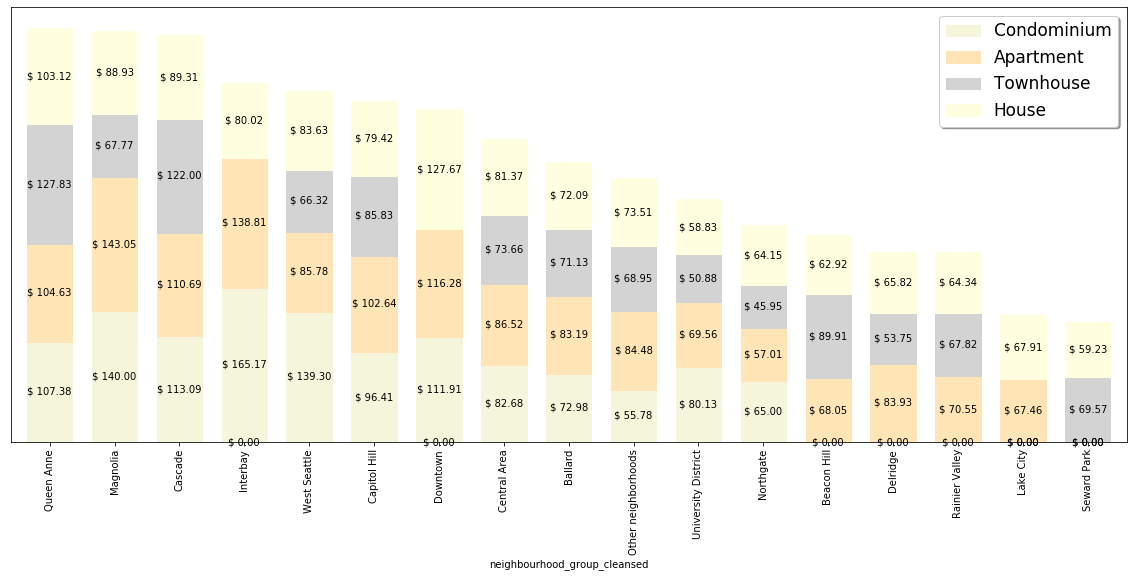

In [418]:
#df_plot2 = df_1.loc[:, 'Condominium': 'House']
chart3 = df_1.loc[:, 'Condominium': 'House'].plot.bar(stacked=True, width = 0.7)

count = 1
color = 'beige'
for p in chart3.patches:
    if count >= 17: color = 'moccasin'
    if count >= 34: color = 'lightgray'
    if count >= 51: color = 'lightyellow'
    p.set_color(color)
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    chart3.text(x+width/2, y+height/2, '$ {:.2f}'.format(height), horizontalalignment='center', verticalalignment='center')
    count += 1
    
chart3.figure.set_size_inches(20, 8)
chart3.yaxis.set_visible(False)
chart3.legend(shadow = True, fontsize = 17)
